In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use matplotlib inline to display plots directly in the notebook
%matplotlib inline

In [2]:
# Load data from a CSV file into a DataFrame
car_sales = pd.read_csv(r'C:\Users\diksh\OneDrive\Desktop\Python Projects\car_prices.csv')

In [3]:
car_sales.shape

(558837, 19)

In [4]:
car_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_month,sale_date,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16.0,2014.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16.0,2014.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15.0,2015.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29.0,2015.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,18.0,2014.0


In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  sale_day      558825 non-null  object 
 16  sale_month    558799 non-null  object 
 17  sale_date     558799 non-null  float64
 18  sale

In [9]:
# Check for null values in the DataFrame
car_sales.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
sale_day           12
sale_month         38
sale_date          38
sale_year          38
dtype: int64

In [10]:
# Drop rows with null values from the DataFrame
car_sales.dropna(inplace=True)


In [11]:
car_sales.shape

(472325, 19)

In [12]:
car_sales.describe()

,year,condition,odometer,mmr,sellingprice,sale_date,sale_year
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058,15.293093,2014.922111
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738,8.630760,0.267997
min,1990.000000,1.000000,1.000000,25.000000,1.000000,1.000000,2014.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000,7.000000,2015.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000,16.000000,2015.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000,22.000000,2015.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,31.000000,2015.000000


In [ ]:
# What are the top 10 manufacturers ranked by sales count?

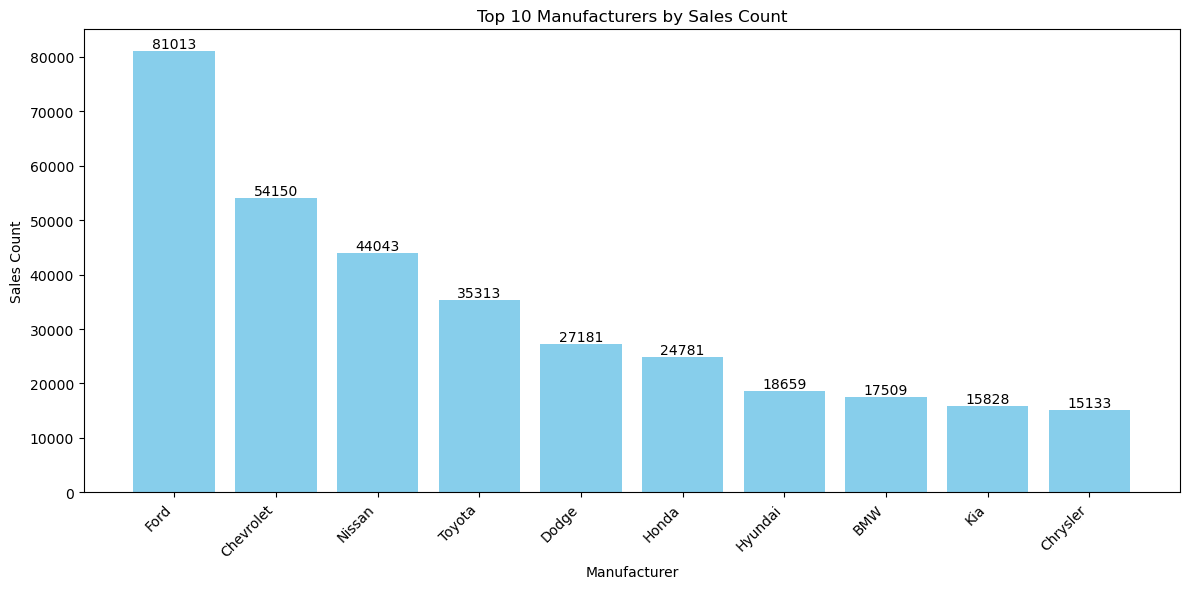

In [13]:
# Group data by manufacturer and count the occurrences
manufacturer_counts = car_sales['make'].value_counts()

# Sort the data by sales count in descending order
manufacturer_counts = manufacturer_counts.sort_values(ascending=False)

# Plot the top 10 manufacturers
plt.figure(figsize=(12, 6))
bars = plt.bar(manufacturer_counts.index[:10], manufacturer_counts[:10], color='skyblue')
plt.title('Top 10 Manufacturers by Sales Count')
plt.xlabel('Manufacturer')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars
for bar, value in zip(bars, manufacturer_counts[:10]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# What are the top 10 manufacturers ranked by Revenue generated?

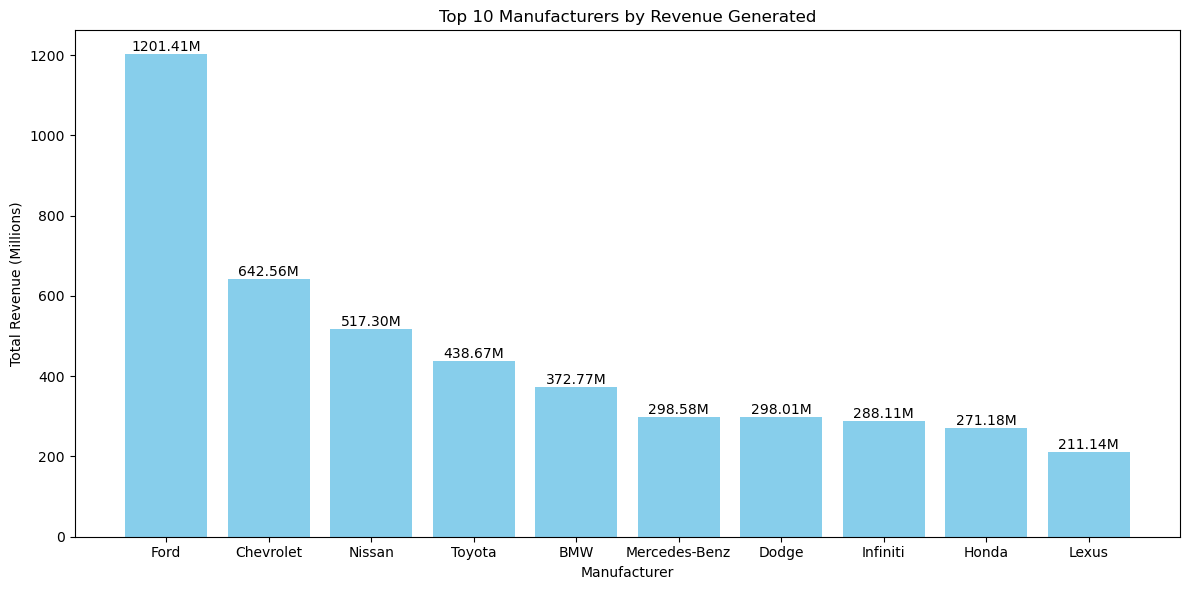

In [14]:
# Group data by manufacturer and sum the selling prices
manufacturer_sales = car_sales.groupby('make')['sellingprice'].sum().reset_index()

# Sort the data by total revenue in descending order
manufacturer_sales = manufacturer_sales.sort_values(by='sellingprice', ascending=False)

# Convert selling prices to millions
manufacturer_sales['sellingprice'] /= 1000000

# Select the top 10 manufacturers
top_10_manufacturers = manufacturer_sales.head(10)

# Plot the top 10 manufacturers
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_manufacturers['make'], top_10_manufacturers['sellingprice'], color='skyblue')
plt.title('Top 10 Manufacturers by Revenue Generated')
plt.xlabel('Manufacturer')
plt.ylabel('Total Revenue (Millions)')

# Add value labels to the bars
for index, value in enumerate(top_10_manufacturers['sellingprice']):
    plt.text(index, value, f'{value:.2f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [15]:
#Ford leads in both sales count (81,013) and revenue generated ($1,201.41M), making it the top performer among all manufacturers,followed by Chevrolet,Nissan and Toyota.

In [ ]:
# What is the distribution of selling prices for the products?

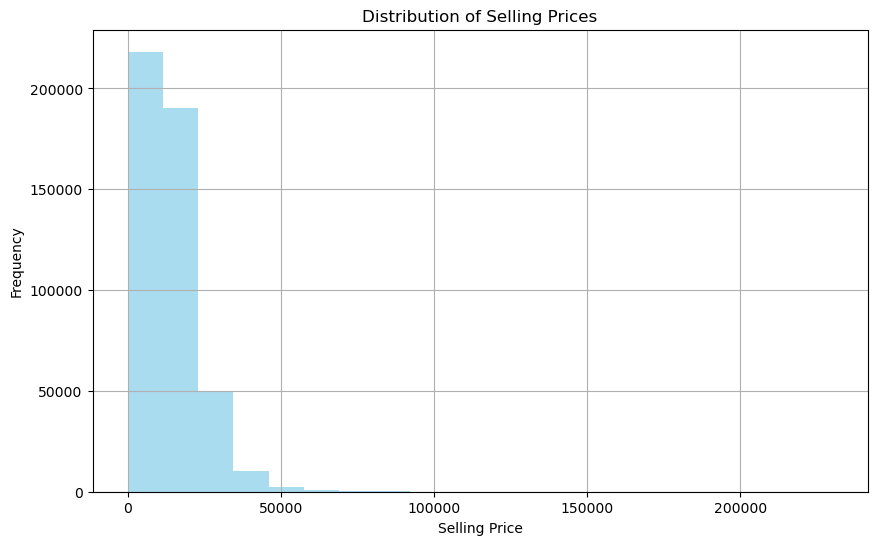

In [16]:
# Plot histogram for selling prices
plt.figure(figsize=(10, 6))
plt.hist(car_sales['sellingprice'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
#Most cars were sold at prices below 50,000

In [ ]:
# What is the most common range upto $50,000?

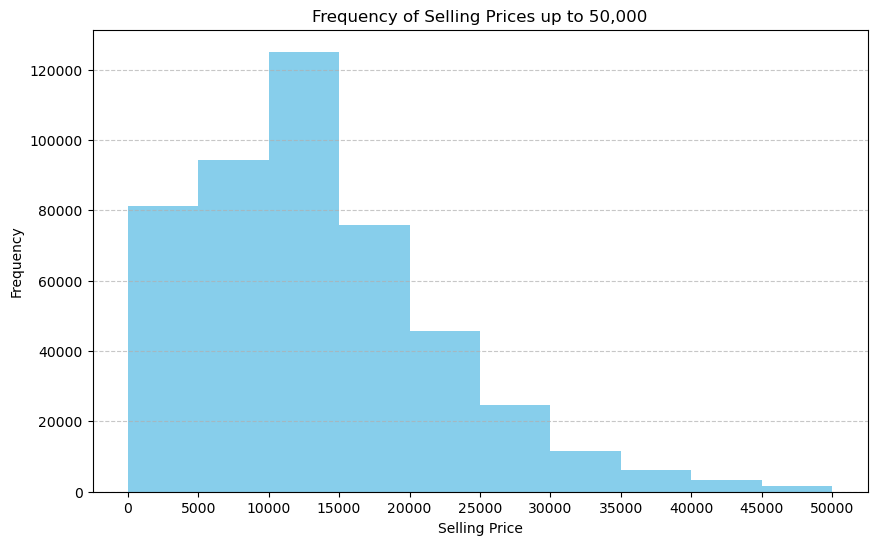

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     

In [18]:
Are there any common price range?
# Define the maximum selling price
max_price = 50000

# Define the number of bins
num_bins = 10

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(car_sales['sellingprice'], bins=num_bins, color='skyblue', range=(0, max_price))
plt.title('Frequency of Selling Prices up to 50,000')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.xticks(range(0, max_price + 1, int(max_price / num_bins)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# We have nearly 120,000 cars sold in the price range of 10,000 to 15,000, making it the most common price range.

In [ ]:
# Count of cars sold in each state?

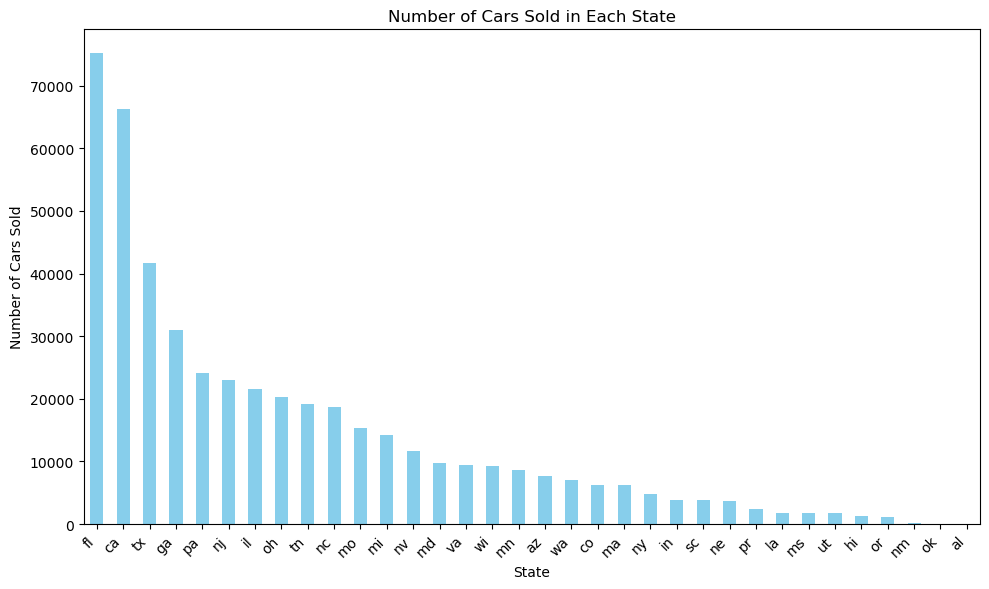

In [20]:
# What is the best state for selling cars?
state_counts = car_sales['state'].value_counts()

# Plotting the number of cars sold in each state
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold in Each State')
plt.xlabel('State')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
#Florida, California, and Texas are the top states for selling cars, with Florida and California selling over 70,000 cars and 60,000 cars respectively.

In [ ]:
# What is the Revenue generated in each state?

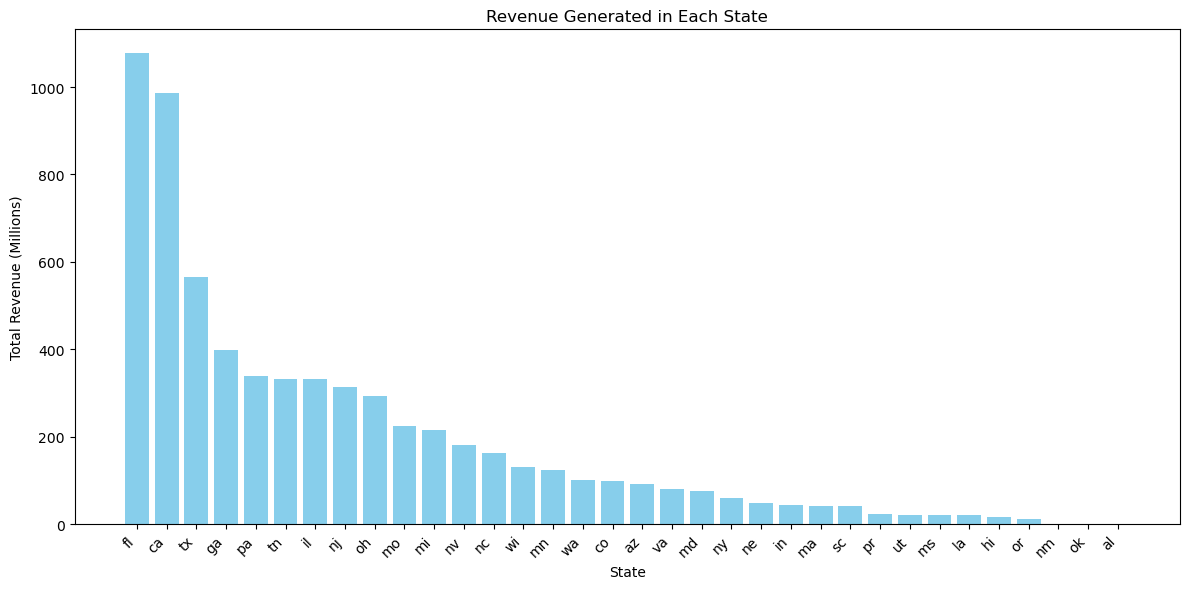

In [22]:
#Which state is the best in terms of revenue generation?
state_revenue = car_sales.groupby('state')['sellingprice'].sum().reset_index()

# Sort the data by total revenue in descending order
state_revenue = state_revenue.sort_values(by='sellingprice', ascending=False)

# Convert revenue to millions
state_revenue['sellingprice'] /= 1000000

# Plot the revenue generated in each state
plt.figure(figsize=(12, 6))
plt.bar(state_revenue['state'], state_revenue['sellingprice'], color='skyblue')
plt.title('Revenue Generated in Each State')
plt.xlabel('State')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
#Florida, California, and Texas are the top states for generating revenue, with Florida and California generating over 1000 Million and 950 Million respectively

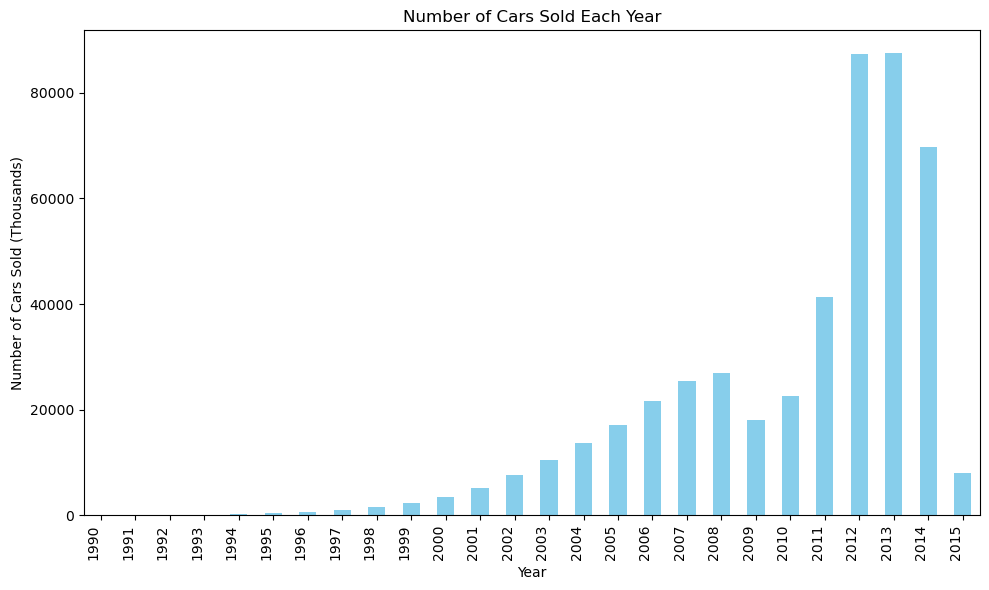

In [24]:
#The number of cars sold on a yearly(manufacturing year) basis.
# Group data by year and count the number of cars sold each year
cars_sold_yearly = car_sales['year'].value_counts().sort_index()

# Convert the counts to thousands
cars_sold_yearly_in_thousands = cars_sold_yearly / 1000

# Plotting
plt.figure(figsize=(10, 6))
cars_sold_yearly.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold (Thousands)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [25]:
#Car sales have been going up a lot in the past few years, which shows that more people are buying cars. The data for 2015 might not be complete, which is why the numbers are lower for that year. As the population in the US keeps growing, the demand for cars is likely to keep increasing too. So, it seems like a good time to get into the car market.

In [ ]:
# Number of car sold and revenue generated in the year 2014?

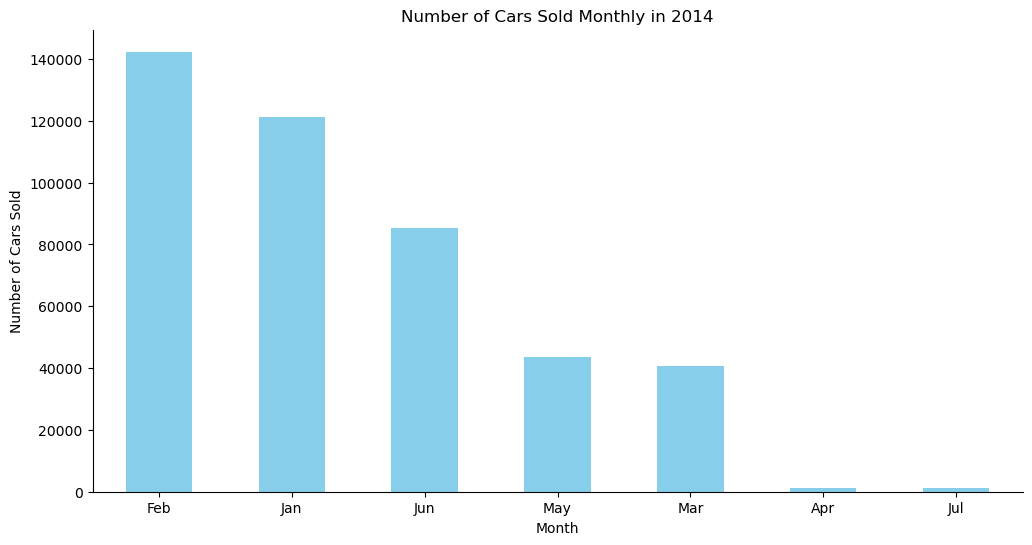

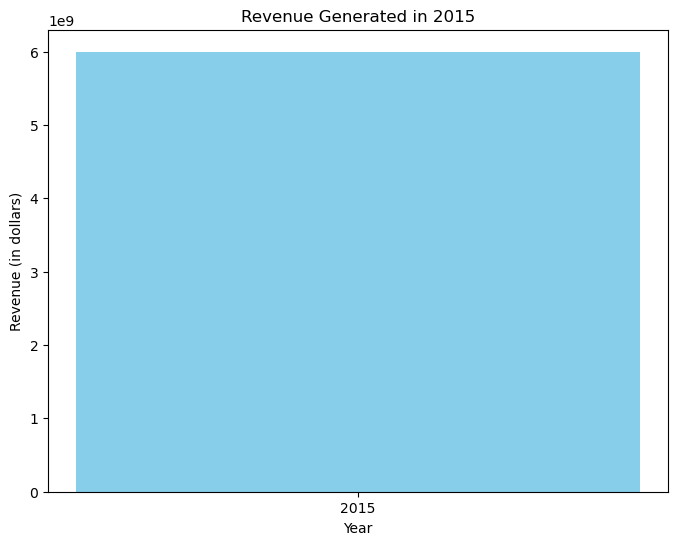

In [27]:
#Which month in the year 2015 had the highest number of car sales and highest revenue generation?
# Filter data for the year 2015
car_sales_2015 = car_sales[car_sales['sale_year'] == 2015]

# Group by month and count the number of cars sold in each month for 2015
cars_sold_monthly_2015 = car_sales_2015.groupby('sale_month').size().sort_values(ascending=False)

# Plot the number of cars sold over each month in 2015
plt.figure(figsize=(12, 6))
cars_sold_monthly_2015.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold Monthly in 2014')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Calculate the revenue generated in 2015
revenue_2015 = car_sales_2015['sellingprice'].sum()

# Plot the revenue generated in 2015
plt.figure(figsize=(8, 6))
plt.bar('2015', revenue_2015, color='skyblue')
plt.title('Revenue Generated in 2014')
plt.xlabel('Year')
plt.ylabel('Revenue (in dollars)')
plt.show()


In [ ]:
# Number of car sold and revenue generated in the year 2015?

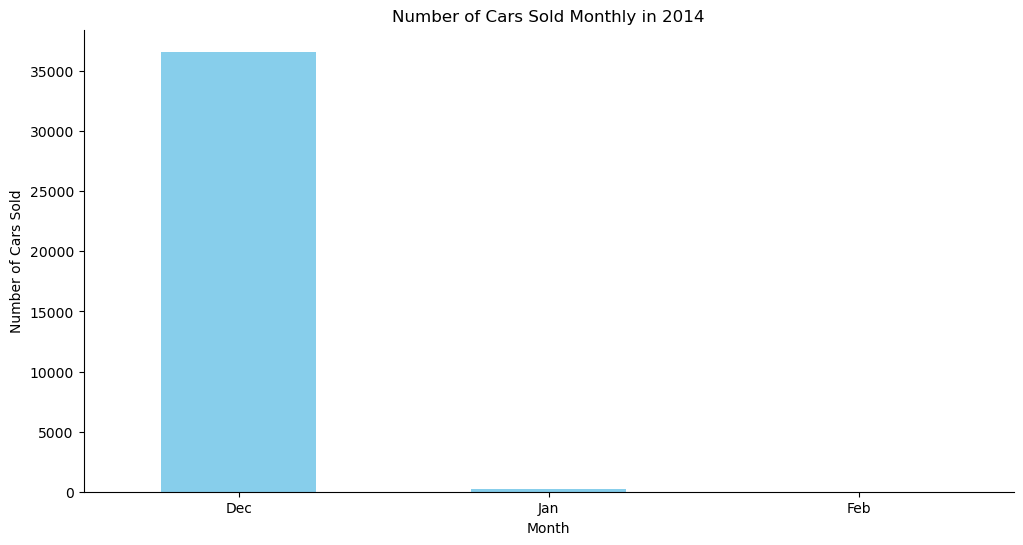

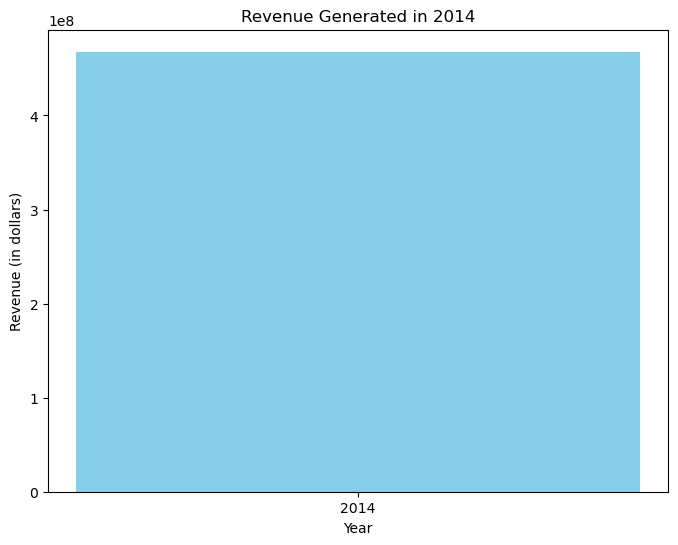

In [26]:
#Which month in the year 2014 had the highest number of car sales and highest revenue generation?
# Filter data for the year 2014
car_sales_2014 = car_sales[car_sales['sale_year'] == 2014]

# Group by month and count the number of cars sold in each month for 2014
cars_sold_monthly_2014 = car_sales_2014.groupby('sale_month').size().sort_values(ascending=False)

# Plot the number of cars sold over each month in 2014
plt.figure(figsize=(12, 6))
cars_sold_monthly_2014.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold Monthly in 2015')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Calculate the revenue generated in 2014
revenue_2014 = car_sales_2014['sellingprice'].sum()

# Plot the revenue generated in 2014
plt.figure(figsize=(8, 6))
plt.bar('2014', revenue_2014, color='skyblue')
plt.title('Revenue Generated in 2015')
plt.xlabel('Year')
plt.ylabel('Revenue (in dollars)')
plt.show()


In [ ]:
# Number of car sold and revenue generated on sale day of 2014?

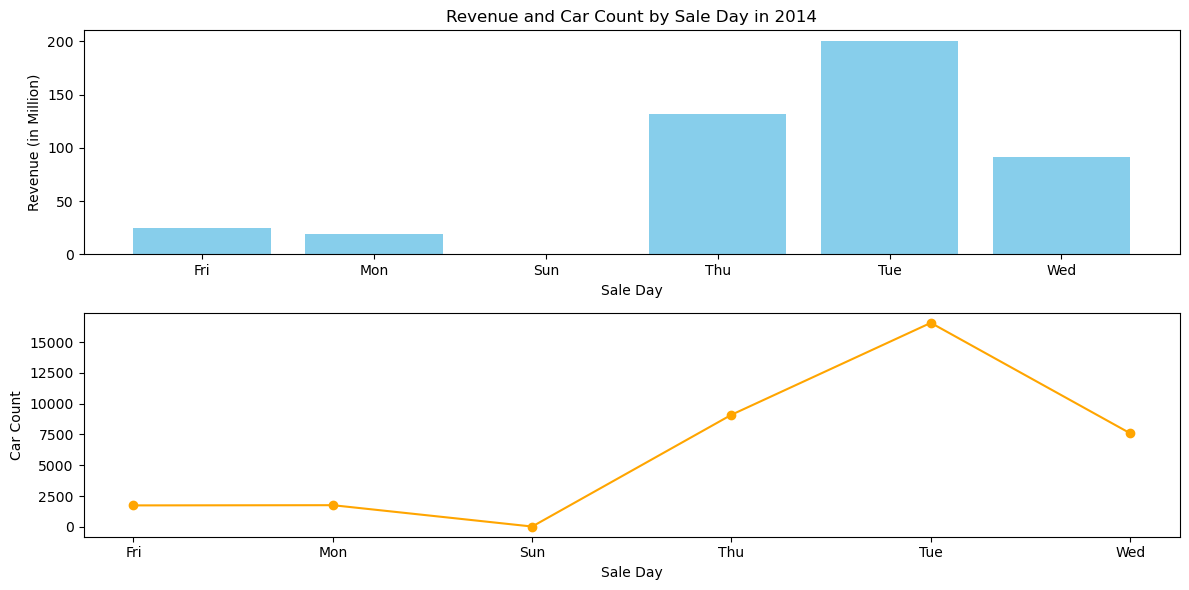

In [30]:
# Filter the data for the year 2014
car_sales_2014 = car_sales[car_sales['sale_year'] == 2014] 

# Group by sale day and calculate total revenue and car count for each day
revenue_and_count_by_day = car_sales_2014.groupby('sale_day').agg({'sellingprice': 'sum', 'sale_day': 'count'})

# Rename the columns for clarity
revenue_and_count_by_day.columns = ['Total Revenue', 'Car Count']

# Convert revenue to millions
revenue_and_count_by_day['Total Revenue'] /= 1000000

# Plot the total revenue and car count for each sale day in 2014
plt.figure(figsize=(12, 6))

# Plot revenue
plt.subplot(2, 1, 1)
plt.bar(revenue_and_count_by_day.index, revenue_and_count_by_day['Total Revenue'], color='skyblue')
plt.title('Revenue and Car Count by Sale Day in 2014')
plt.xlabel('Sale Day')
plt.ylabel('Revenue (in Million)')

# Plot car count
plt.subplot(2, 1, 2)
plt.plot(revenue_and_count_by_day.index, revenue_and_count_by_day['Car Count'], color='orange', marker='o')
plt.xlabel('Sale Day')
plt.ylabel('Car Count')

plt.tight_layout()
plt.show()


In [ ]:
# Number of car sold and revenue generated on sale day of 2015?

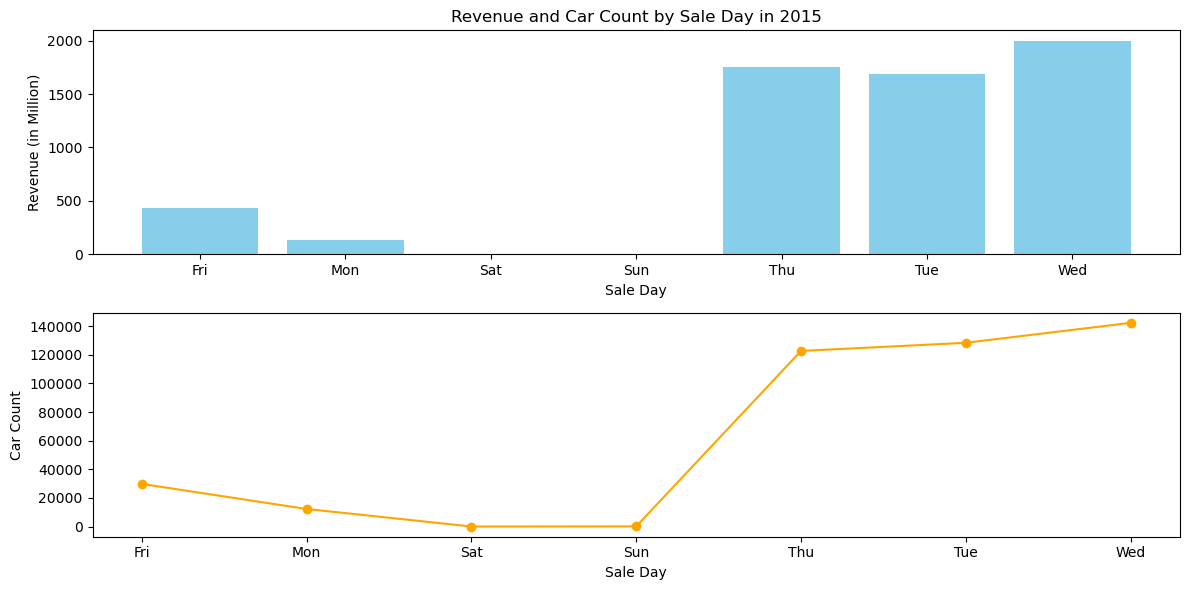

In [34]:
# Filter the data for the year 2015
car_sales_2015 = car_sales[(car_sales['sale_year'] == 2015)]

# Group by sale day and calculate total revenue and car count for each day
revenue_and_count_by_day = car_sales_2015.groupby('sale_day').agg({'sellingprice': 'sum', 'sale_day': 'count'})

# Rename the columns for clarity
revenue_and_count_by_day.columns = ['Total Revenue', 'Car Count']

# Convert revenue to millions
revenue_and_count_by_day['Total Revenue'] /= 1000000

# Plot the total revenue and car count for each sale day in 2015
plt.figure(figsize=(12, 6))

# Plot revenue
plt.subplot(2, 1, 1)
plt.bar(revenue_and_count_by_day.index, revenue_and_count_by_day['Total Revenue'], color='skyblue')
plt.title('Revenue and Car Count by Sale Day in 2015')
plt.xlabel('Sale Day')
plt.ylabel('Revenue (in Million)')

# Plot car count
plt.subplot(2, 1, 2)
plt.plot(revenue_and_count_by_day.index, revenue_and_count_by_day['Car Count'], color='orange', marker='o')
plt.xlabel('Sale Day')
plt.ylabel('Car Count')

plt.tight_layout()
plt.show()


In [ ]:
# What is the breakdown of sales and revenue generated by car condition?

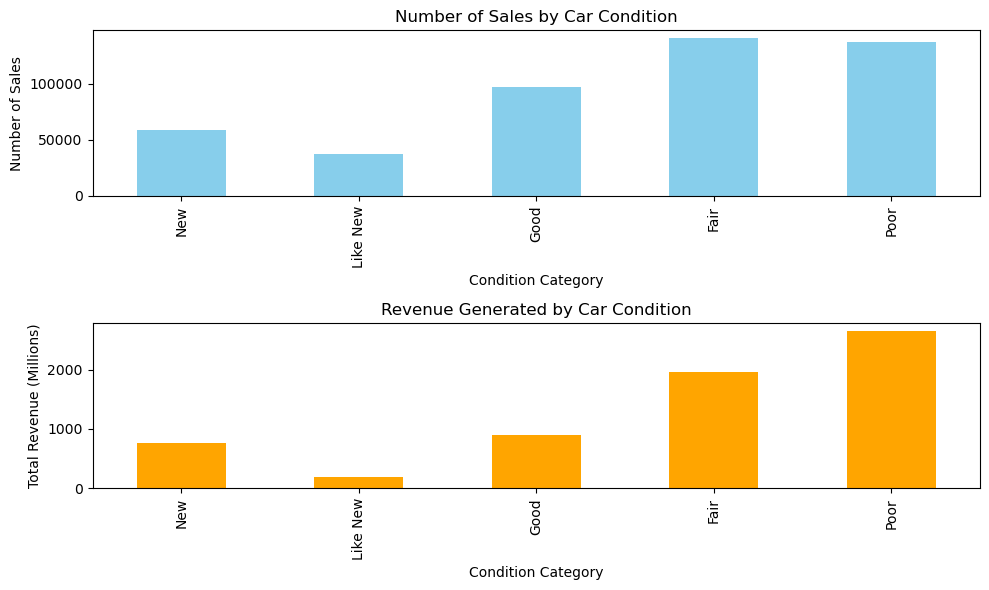

In [36]:
# Define the condition ranges and labels for the new categories
conditions = {
    'New': (1, 10),
    'Like New': (11, 20),
    'Good': (21, 30),
    'Fair': (31, 40),
    'Poor': (41, 49)}

# Map existing condition values to the new categories
car_sales['condition_category'] = pd.cut(car_sales['condition'], bins=[0] + [condition[1] for condition in conditions.values()], labels=conditions.keys())

# Group the data by the new condition categories and calculate total sales count and revenue
condition_sales_revenue = car_sales.groupby('condition_category', observed=False).agg({'sellingprice': 'sum', 'sale_day': 'count'})
condition_sales_revenue.columns = ['Total Revenue', 'Sales Count']

# Convert revenue to millions
condition_sales_revenue['Total Revenue'] /= 1000000

# Plot the results
plt.figure(figsize=(10, 6))

# Plot sales count
plt.subplot(2, 1, 1)
condition_sales_revenue['Sales Count'].plot(kind='bar', color='skyblue')
plt.title('Number of Sales by Car Condition')
plt.xlabel('Condition Category')
plt.ylabel('Number of Sales')

# Plot revenue
plt.subplot(2, 1, 2)
condition_sales_revenue['Total Revenue'].plot(kind='bar', color='orange')
plt.title('Revenue Generated by Car Condition')
plt.xlabel('Condition Category')
plt.ylabel('Total Revenue (Millions)')

plt.tight_layout()
plt.show()


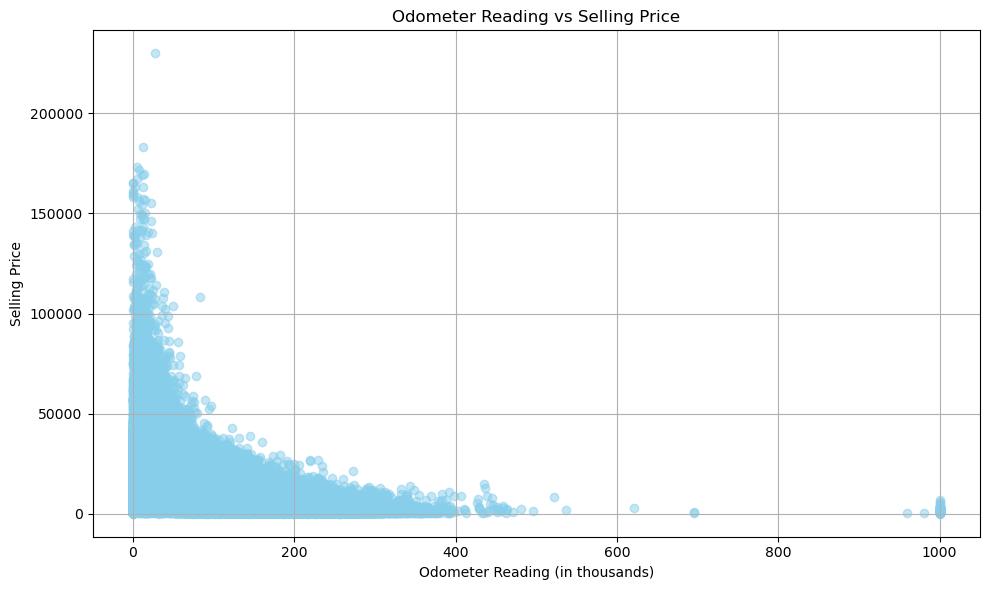

In [37]:
# Plotting odometer reading vs selling price
plt.figure(figsize=(10, 6))
plt.scatter(car_sales['odometer'] / 1000, car_sales['sellingprice'], color='skyblue', alpha=0.5)
plt.title('Odometer Reading vs Selling Price')
plt.xlabel('Odometer Reading (in thousands)')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
#There is a tendency for cars with lower odometer readings to sell for higher prices, although the relationship is not extremely strong.

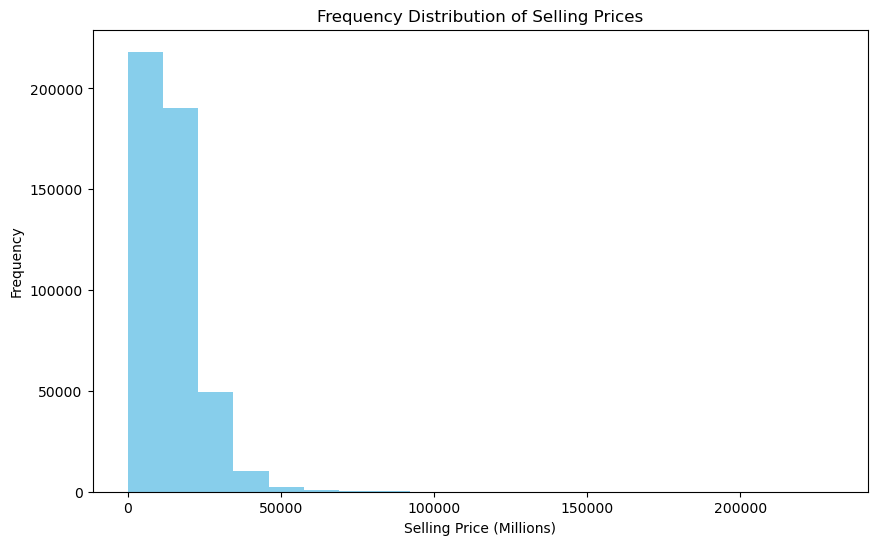

In [39]:
# Plotting the frequency distribution of selling prices
plt.figure(figsize=(10, 6))
plt.hist(car_sales['sellingprice'], bins=20, color='skyblue')
plt.title('Frequency Distribution of Selling Prices')
plt.xlabel('Selling Price (Millions)')
plt.ylabel('Frequency')
plt.show()

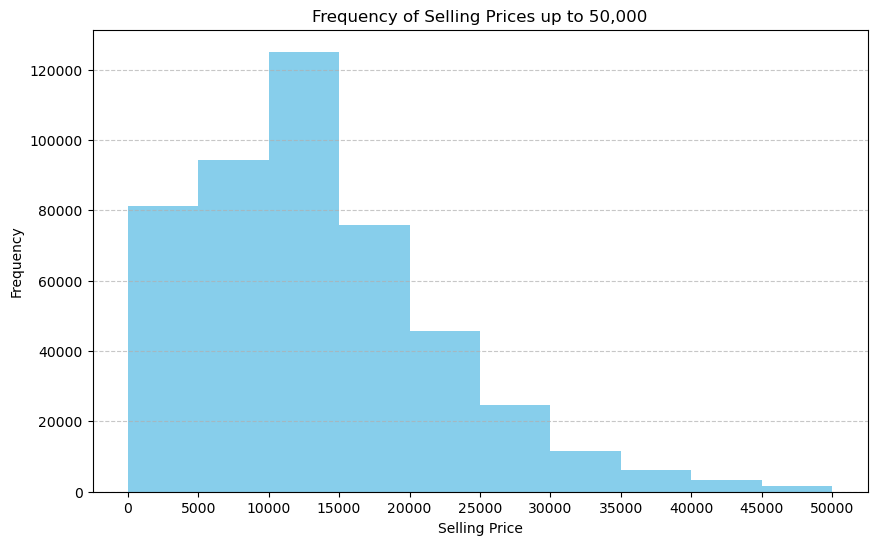

In [40]:
# Define the maximum selling price
max_price = 50000

# Define the number of bins
num_bins = 10

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(car_sales['sellingprice'], bins=num_bins, color='skyblue', range=(0, max_price))
plt.title('Frequency of Selling Prices up to 50,000')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.xticks(range(0, max_price + 1, int(max_price / num_bins)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
# We have nearly 120,000 cars sold in the price range of 10,000 to 15,000, making it the most common price range

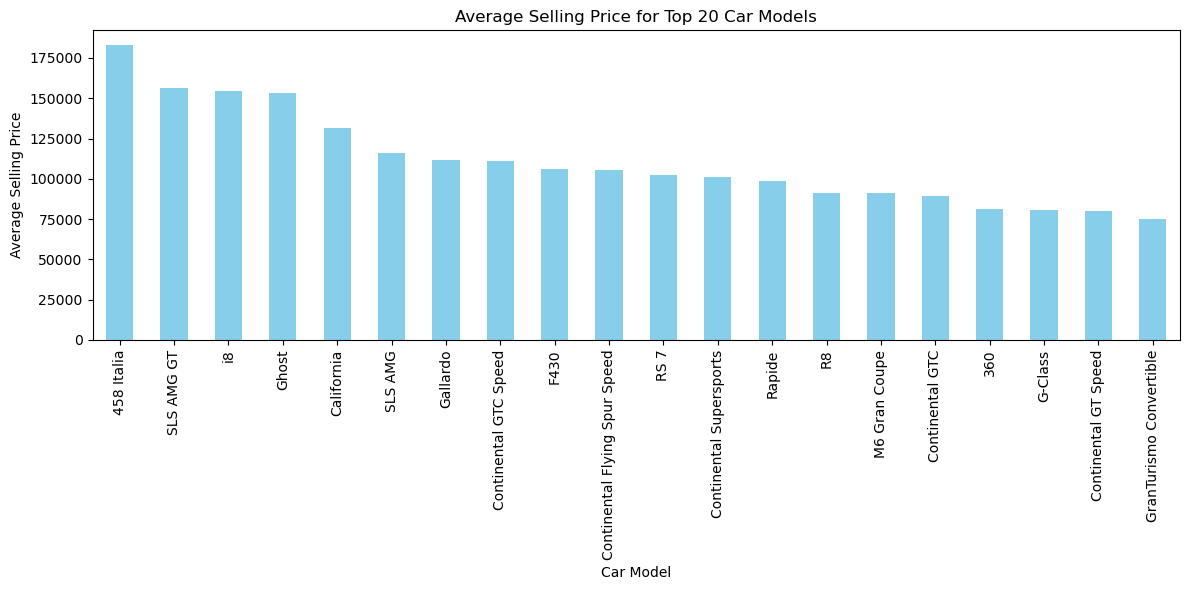

In [42]:
# Group the data by car model and calculate the mean selling price for each model
average_selling_price_by_model = car_sales.groupby('model')['sellingprice'].mean()

# Sort the data by average selling price in descending order and select the top 20 models
top_20_average_selling_price = average_selling_price_by_model.nlargest(20)

# Plotting the data
plt.figure(figsize=(12, 6))
top_20_average_selling_price.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price for Top 20 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Average Selling Price')
plt.tight_layout()
plt.show()

In [44]:
#It's interesting to observe that while the Ferrari 458 Italia commands the highest average selling price, the Toyota Paseo sits at the opposite end of the spectrum with the lowest average selling price  in our dataset.

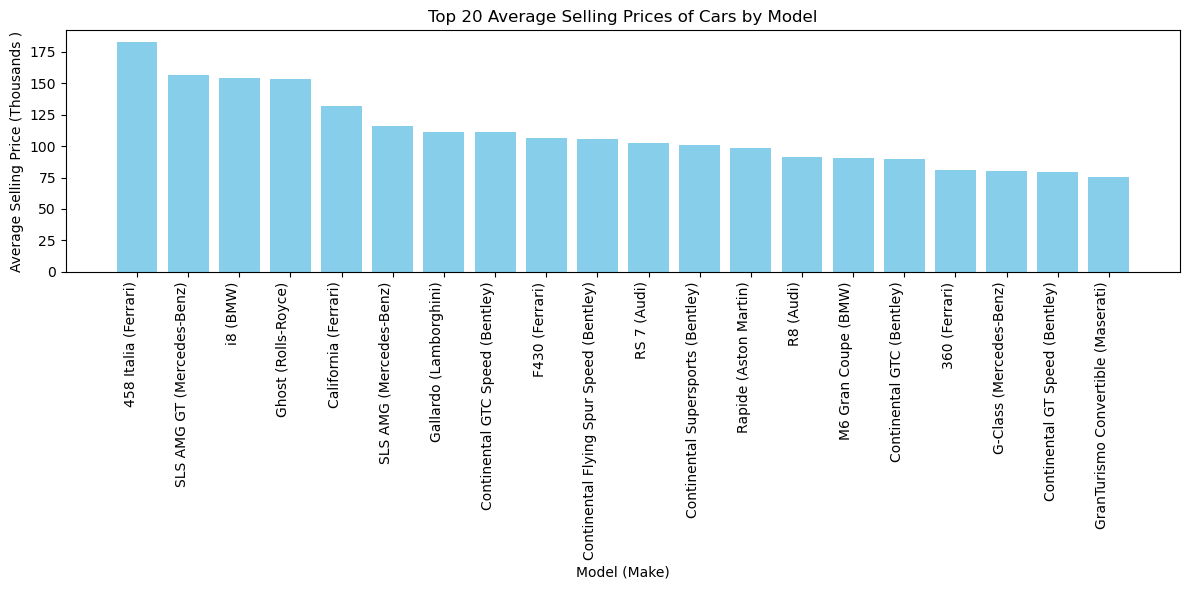

In [51]:
#What are the top 20 car models by average selling price, considering both the make and model?
# Group the data by make and model, then calculate the average selling price for each combination
average_price_by_model = car_sales.groupby(['make', 'model'])['sellingprice'].mean()

# Reset the index to make the grouped columns accessible
average_price_by_model = average_price_by_model.reset_index()

# Sort the data by average selling price in descending order and select the top 20 models
top_20_models = average_price_by_model.sort_values(by='sellingprice', ascending=False).head(20)

# Plotting the average selling price for each model
plt.figure(figsize=(12, 6))
plt.bar(top_20_models['model'] + ' (' + top_20_models['make'] + ')', top_20_models['sellingprice'] / 1000, color='skyblue')
plt.title('Top 20 Average Selling Prices of Cars by Model')
plt.xlabel('Model (Make)')
plt.ylabel('Average Selling Price (Thousands )')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


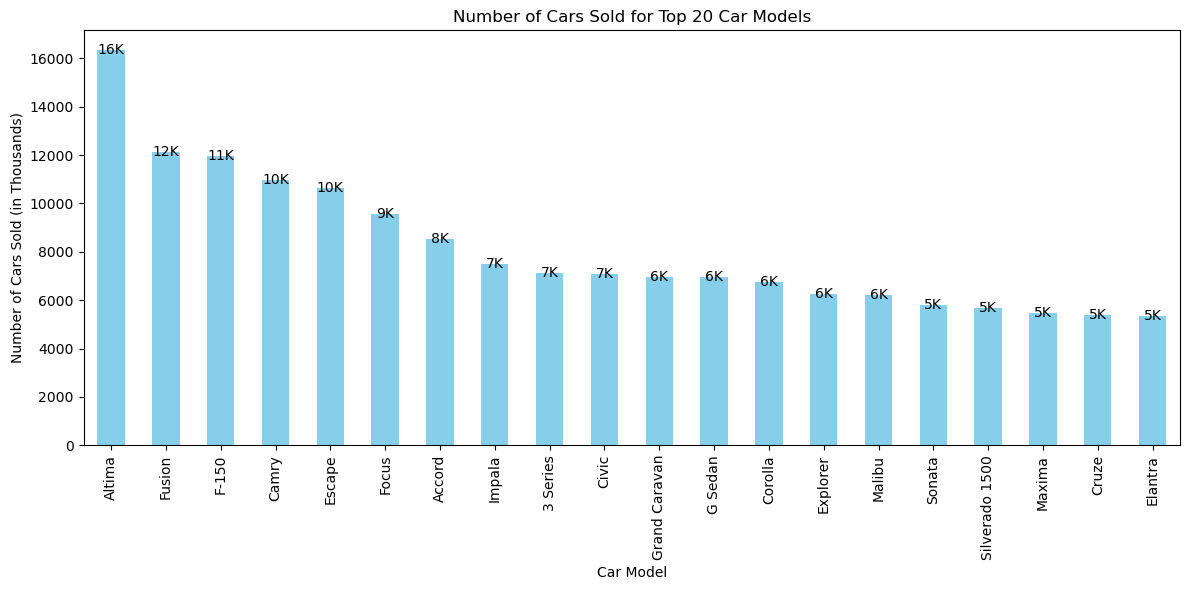

In [48]:
#Which car model achieved the highest sales count?
# Group the data by car model and calculate the number of cars sold for each model
cars_sold_by_model = car_sales.groupby('model').size()

# Sort the data by the number of cars sold in descending order and select the top 20 models
top_20_cars_sold = cars_sold_by_model.nlargest(20)

# Plotting the data
plt.figure(figsize=(12, 6))
top_20_cars_sold.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold for Top 20 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Cars Sold (in Thousands)')

# Annotate each bar with its value
for i, value in enumerate(top_20_cars_sold):
    plt.text(i, value, f'{int(value/1000)}K', ha='center', va='center', color='black')  # Using center alignment


plt.tight_layout()
plt.show()

In [52]:
#Among the top 20 car models, the Nissan Altima boasts the highest number of cars sold, totaling nearly 16,000, while the Elatra records the lowest sales count.

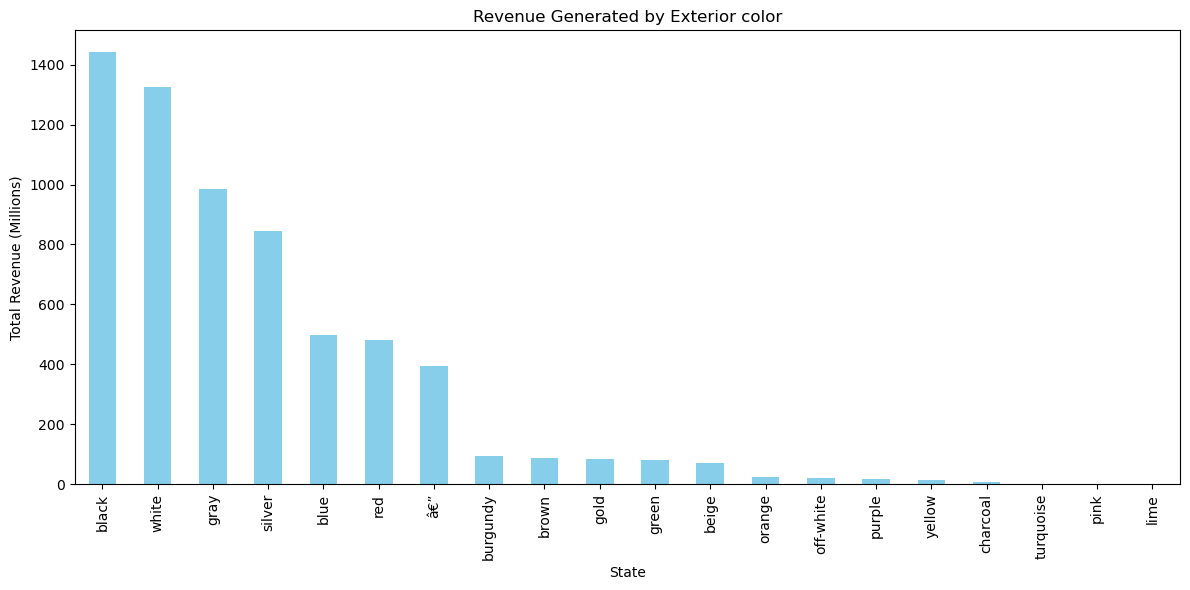

In [53]:
# Which exterior colors have contributed the most to revenue?
# Group the data by state and calculate total revenue generated in each state
revenue_by_color = car_sales.groupby('color')['sellingprice'].sum()

# Convert revenue to millions
revenue_by_color = revenue_by_color / 1000000

# Sort the data by total revenue generated in descending order
revenue_by_color = revenue_by_color.sort_values(ascending=False)

# Plot the total revenue generated for each exterior color
plt.figure(figsize=(12, 6))
revenue_by_color.plot(kind='bar', color='skyblue')
plt.title('Revenue Generated by Exterior color')
plt.xlabel('State')
plt.ylabel('Total Revenue (Millions)')
plt.tight_layout()
plt.show()

In [54]:
#Black and white colors have generated revenue exceeding 1200 million, while gray has generated revenue surpassing 950 million.

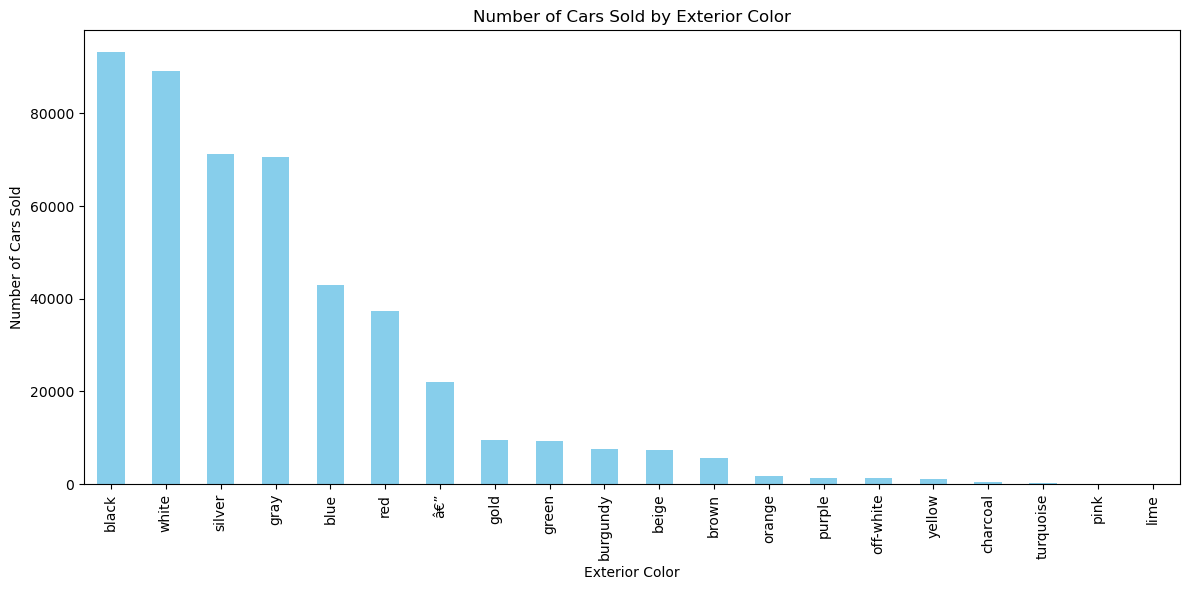

In [55]:
# Group the data by exterior color and calculate the total number of cars sold for each color
car_count_by_color = car_sales.groupby('color').size()

# Sort the data by total car count in descending order
car_count_by_color = car_count_by_color.sort_values(ascending=False)

# Plot the total number of cars sold for each exterior color
plt.figure(figsize=(12, 6))
car_count_by_color.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold by Exterior Color')
plt.xlabel('Exterior Color')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()


In [57]:
#The top three colors by car count are black, white, and silver, with black leading at 93,244 cars sold, followed by white at 89,233, and silver at 71,251.

Object `color` not found.


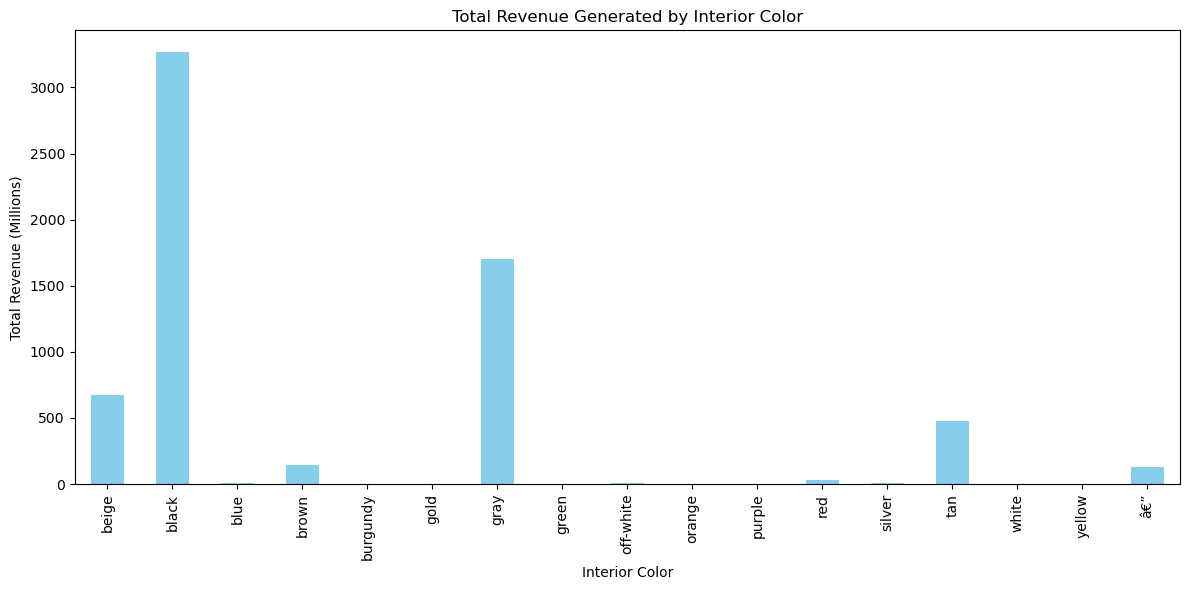

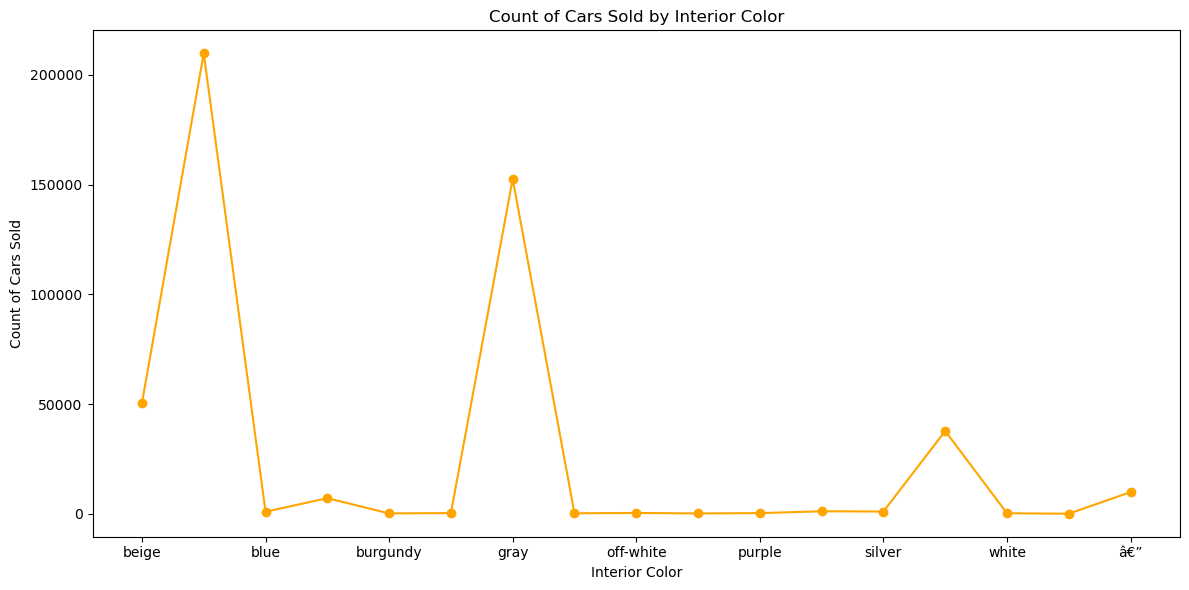

In [58]:
What is the revenue generated and the count of cars sold for each interior color?
# Group the data by interior color and calculate total revenue and count of cars sold for each color
revenue_and_count_by_interior = car_sales.groupby('interior').agg({'sellingprice': 'sum', 'interior': 'count'})

# Rename the columns for clarity
revenue_and_count_by_interior.columns = ['Total Revenue', 'Count of Cars Sold']

# Convert revenue to millions
revenue_and_count_by_interior['Total Revenue'] /= 1000000

# Plot the total revenue generated by interior color
plt.figure(figsize=(12, 6))
revenue_and_count_by_interior['Total Revenue'].plot(kind='bar', color='skyblue')
plt.title('Total Revenue Generated by Interior Color')
plt.xlabel('Interior Color')
plt.ylabel('Total Revenue (Millions)')

plt.tight_layout()
plt.show()

# Plot the count of cars sold by interior color
plt.figure(figsize=(12, 6))
revenue_and_count_by_interior['Count of Cars Sold'].plot(kind='line', marker='o', color='orange')
plt.title('Count of Cars Sold by Interior Color')
plt.xlabel('Interior Color')
plt.ylabel('Count of Cars Sold')
plt.tight_layout()
plt.show()

In [59]:
#Among the top interior colors by total revenue, black garnered the highest revenue, followed by gray and beige. However, in terms of car count, black still led with the highest number of cars sold, followed by gray and beige.

C:\Users\diksh\AppData\Local\Temp\ipykernel_3652\3141865729.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_sales_revenue = car_sales.groupby('condition_category').agg({'sellingprice': 'sum', 'sale_day': 'count'})


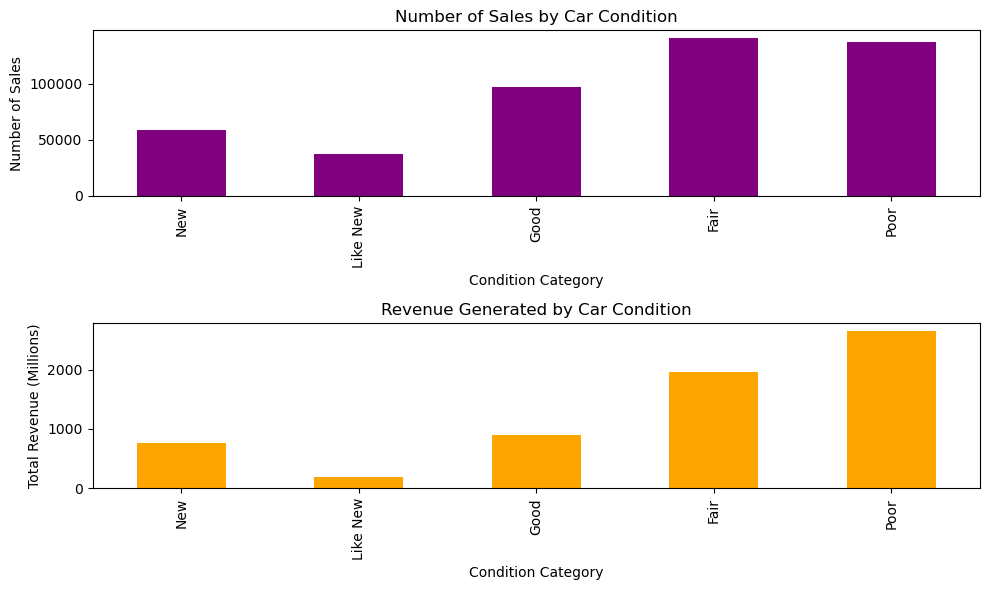

In [60]:
# Define the condition ranges and labels for the new categories
conditions = {
    'New': (1, 10),
    'Like New': (11, 20),
    'Good': (21, 30),
    'Fair': (31, 40),
    'Poor': (41, 49)
}

# Map existing condition values to the new categories
car_sales['condition_category'] = pd.cut(car_sales['condition'], bins=[0] + [condition[1] for condition in conditions.values()], labels=conditions.keys())

# Group the data by the new condition categories and calculate total sales count and revenue
condition_sales_revenue = car_sales.groupby('condition_category').agg({'sellingprice': 'sum', 'sale_day': 'count'})
condition_sales_revenue.columns = ['Total Revenue', 'Sales Count']

# Convert revenue to millions
condition_sales_revenue['Total Revenue'] /= 1000000

# Plot the results
plt.figure(figsize=(10, 6))

# Plot sales count
plt.subplot(2, 1, 1)
condition_sales_revenue['Sales Count'].plot(kind='bar', color='purple')
plt.title('Number of Sales by Car Condition')
plt.xlabel('Condition Category')
plt.ylabel('Number of Sales')

# Plot revenue
plt.subplot(2, 1, 2)
condition_sales_revenue['Total Revenue'].plot(kind='bar', color='orange')
plt.title('Revenue Generated by Car Condition')
plt.xlabel('Condition Category')
plt.ylabel('Total Revenue (Millions)')

plt.tight_layout()
plt.show()

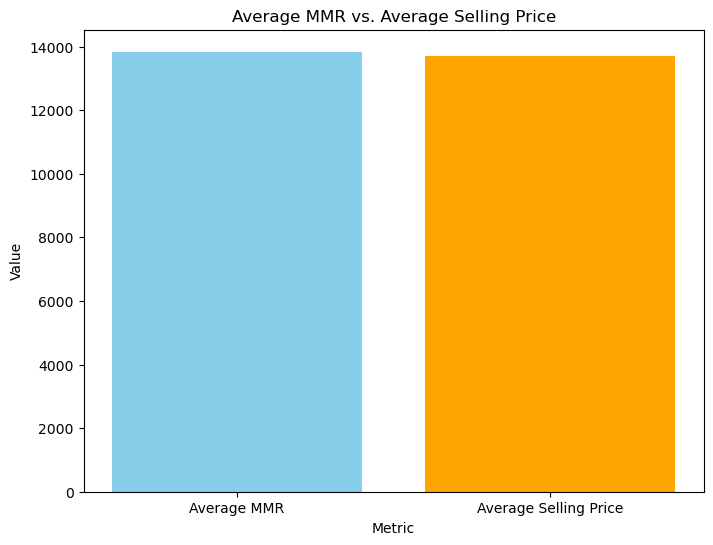

Average MMR: 13837.058963637326
Average Selling Price: 13690.51205843434


In [63]:

# Calculate the average MMR and average selling price
average_mmr = car_sales['mmr'].mean()
average_selling_price = car_sales['sellingprice'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Average MMR', 'Average Selling Price'], [average_mmr, average_selling_price], color=['skyblue', 'orange'])
plt.title('Average MMR vs. Average Selling Price')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

# Calculate the average MMR for cars in the inventory
average_mmr = car_sales['mmr'].mean()

# Calculate the average selling price for cars in the inventory
average_selling_price = car_sales['sellingprice'].mean()

# Print the average MMR and average selling price
print("Average MMR:", average_mmr)
print("Average Selling Price:", average_selling_price)

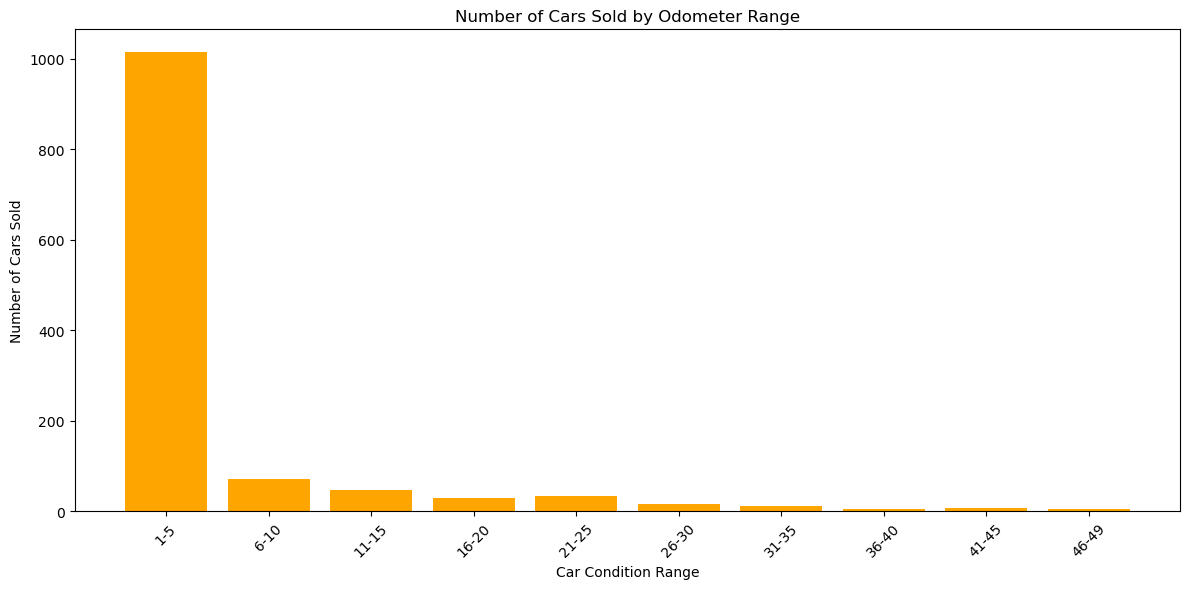

In [69]:
# Define the condition ranges and labels
conditions = [(1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31, 35), (36, 40), (41, 45), (46, 49)]
labels = [f'{start}-{end}' for start, end in conditions]

# Initialize a list to store the number of cars sold for each label
car_counts = []

# Iterate through each condition range
for condition in conditions:
    # Filter cars falling within the current condition range
    filtered_cars = car_sales[(car_sales['odometer'] >= condition[0]) & (car_sales['odometer'] <= condition[1])]
    
    # Get the number of cars sold for cars in this condition range
    car_counts.append(len(filtered_cars))

# Plot the number of cars sold for each label
plt.figure(figsize=(12, 6))
plt.bar(labels, car_counts, color='orange')
plt.title('Number of Cars Sold by Odometer Range')
plt.xlabel('Car Condition Range')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



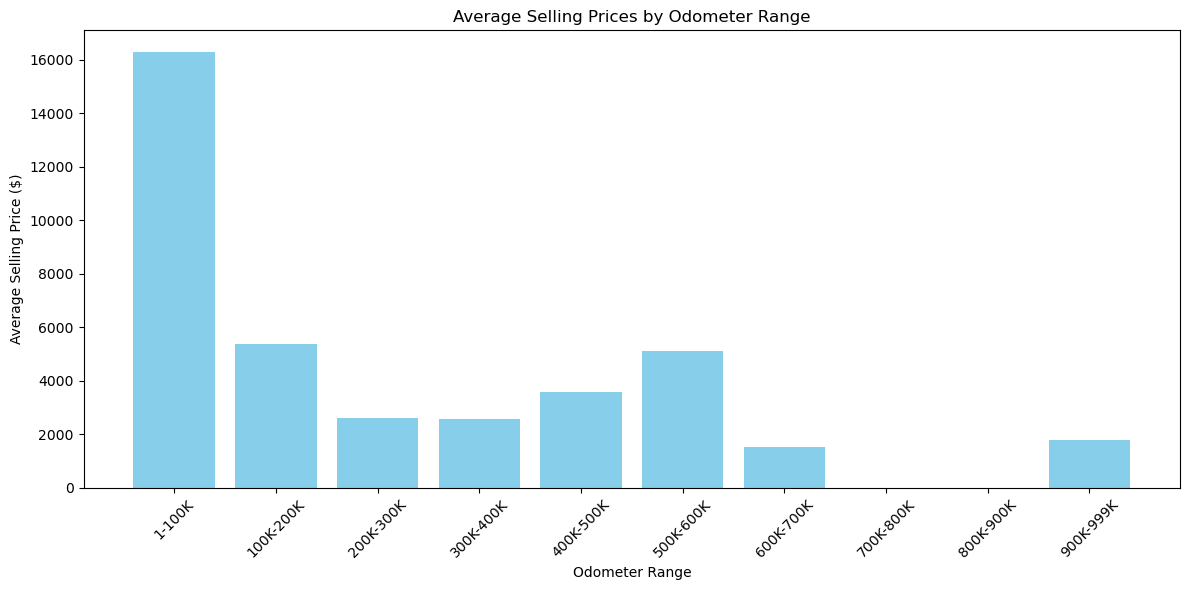

In [68]:
# Define the condition ranges and labels
conditions = [(1, 100000), (100001, 200000), (200001, 300000), (300001, 400000), (400001, 500000), 
              (500001, 600000), (600001, 700000), (700001, 800000), (800001, 900000), (900001, 999999)]
labels = ['1-100K', '100K-200K', '200K-300K', '300K-400K', '400K-500K', '500K-600K', 
          '600K-700K', '700K-800K', '800K-900K', '900K-999K']

# Initialize a list to store average selling prices for each label
avg_prices = []

# Iterate through each condition range
for condition in conditions:
    # Filter cars falling within the current condition range
    filtered_cars = car_sales[(car_sales['odometer'] >= condition[0]) & (car_sales['odometer'] <= condition[1])]
    
    # Calculate the average selling price for cars in this condition range
    avg_prices.append(np.mean(filtered_cars['sellingprice']))

# Plot the average selling prices for each label
plt.figure(figsize=(12, 6))
plt.bar(labels, avg_prices, color='skyblue')
plt.title('Average Selling Prices by Odometer Range')
plt.xlabel('Odometer Range')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()